In [1]:
import pandas as pd 
import numpy 
import string

import re

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

import requests
from wordcloud import WordCloud,ImageColorGenerator
nltk.download('popular')




[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [4]:
in_info = pd.read_csv(r'E:\PFA_Kamari_Mohammed-Satori_Najwa\Python_Data\TweetExel\train_E6oV3lV.csv')

In [ ]:
in_info

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
print(in_info.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [ ]:
in_info.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
# cette fonction de Count() pour faire calculer le nbr des tweets qui ont comme label 1 ou 0 
in_info.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


la fonction de countplot pour afficher combien de tweets
sont avec le label 1 et les tweets avec label 0


<Axes: xlabel='label', ylabel='count'>

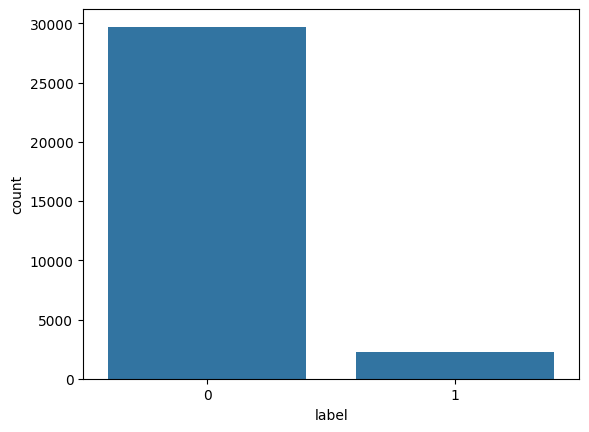

In [ ]:
import seaborn as visuel 
visuel.countplot(x='label',data=in_info)

Affecter aux labels avec mention =0 la valeur donnee_positive 

In [ ]:
Donnee_positive = in_info.loc[in_info['label']==0]

Donnee_positive

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


Affecter la valeur Donnee_Negative au labels dans lurs mentions = 1 

In [ ]:
Donnee_negative = in_info.loc[in_info['label'] == 1]
Donnee_negative

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


Afficher le nombre des twwets avec les nouveaux nomination affectées de 'Données positives ' et 'Donnee_negatives' utilisant la fonction count()

In [ ]:
print('Positifs_tweets',Donnee_positive.count())
print('Negatifs_tweets',Donnee_negative.count())

Positifs_tweets id       29720
label    29720
tweet    29720
dtype: int64
Negatifs_tweets id       2242
label    2242
tweet    2242
dtype: int64


il faut filtrer les tweets que nous avons parceque ils contiennent des @ des elements que nous avons pas besoins 
alors il faut les supprimer en utilisant une fonction en python 
En utilisant NLTK
ou Natural Language Toolkit, est une bibliothèque Python populaire utilisée pour le traitement du langage naturel (NLP). Elle offre un ensemble d'outils et de ressources pour travailler avec des données textuelles en langage naturel. Voici quelques points clés à connaître sur NLTK :

In [ ]:
import nltk
nltk.download('stopwords')
words_avoid = set(stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer

def transformationtweet(col_tweet):
    col_tweet.lower()
    col_tweet = re.sub(r"http\S|www\S|https\S",'',col_tweet,flags=re.MULTILINE)
    col_tweet = re.sub(r'\@\w+|\#','',col_tweet)
    col_tweet = col_tweet.translate(str.maketrans('','',string.punctuation))
    words_form = word_tokenize(col_tweet)
    words_refind = [w for w in words_form if not w in words_avoid]
    words_vth_letters = [w for w in words_refind if w.isalpha()]
    porter_stemer = PorterStemmer()
    words_aftr_stemming = [porter_stemer.stem(w) for w in words_vth_letters ]
    func_leam = WordNetLemmatizer()
    words_aftr_leam=[func_leam.lemmatize(w,pos='v') for w in words_aftr_stemming]
    return " ".join(words_aftr_leam) 
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
in_info.tweet = in_info['tweet'].apply(transformationtweet)
in_info

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday majesti
3,4,0,model love u take u time
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,eat isz
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


Convertir les mot qui ont comme label=0 to string et assigner "words_wth_label0" et pour les labels =1 "words_wth_label1"

In [ ]:
words_wth_label0 = transformationtweet(pd.Series(Donnee_positive.tweet).to_string())
words_wth_label1 = transformationtweet(pd.Series(Donnee_negative.tweet).to_string())

In [ ]:
words_wth_label0


'father dysfunct thank lyft credit cant us bihday majesti model love u take u time factsguid societi motiv huge fan fare big talk camp tomorrow next school year year love land allin cav champ welcom im gr ireland consum price index mom climb selfish orlando standwithorlando get see daddi today getti ouchjunior junior yugyo thank paner thank p friday smile around via ig use know essenti oil make peopl blame ha conced goal sad littl dude badday coneofsham cat product day happi man wine tool tgif ff gamedev indiedev beauti sign vendor upsi smile media great panel mediat happi father day peopl go nightclub good nig never chanc vote presid alohafriday time exist positiv rip fellow nohern ireland fan wh hard monday due cloudi weather di bull domin morn travelingram dalat ripinkylif one word tell p oh cedarpoint wait hour valravn thank sunshin thank positiv final finish book youv wor yup knick fan hard easier life social network embrac mom share bihday bihda love echeveria bloomsflow grow gar

In [ ]:
words_wth_label1

'cnn call michigan middl school buil comment australia opkillingbay se retweet agre lumpi say prove lumpi unbeliev centuri let fight love peac white establish cant blk fol hey white peopl call peopl altright use amp insecur lu im interest linguist tha mock obama bla peopl arent protest trump ye call michelleobama goril smaller hand show barri probabl lie point one finger million might libtard libtard sjw l take trash america vote hold open door woman sh man run governor ny sta stereotyp prejudic offer hope manypol pass mani time sai horribl ad make us cring die light villag green never answer statem might libtard libtard sjw l trump ny cochair make racist remark pic say otherwis young girl c your block troll nazi studi american race law biher absolut origin hatef fo woh offic viral arrest video discuss republican thing cr black amp feel like stompi allahsoil familiar becom anti racist codeword antiwhit asia prais cleveland polic r doesnt prevent girl world sexi matur housewif dont like

In [ ]:
len(words_wth_label0)

749516

In [ ]:
len(words_wth_label1)

58276

In [ ]:
Corpus_positive = words_wth_label0.split(' ')
Corpus_positive

['father',
 'dysfunct',
 'thank',
 'lyft',
 'credit',
 'cant',
 'us',
 'bihday',
 'majesti',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'factsguid',
 'societi',
 'motiv',
 'huge',
 'fan',
 'fare',
 'big',
 'talk',
 'camp',
 'tomorrow',
 'next',
 'school',
 'year',
 'year',
 'love',
 'land',
 'allin',
 'cav',
 'champ',
 'welcom',
 'im',
 'gr',
 'ireland',
 'consum',
 'price',
 'index',
 'mom',
 'climb',
 'selfish',
 'orlando',
 'standwithorlando',
 'get',
 'see',
 'daddi',
 'today',
 'getti',
 'ouchjunior',
 'junior',
 'yugyo',
 'thank',
 'paner',
 'thank',
 'p',
 'friday',
 'smile',
 'around',
 'via',
 'ig',
 'use',
 'know',
 'essenti',
 'oil',
 'make',
 'peopl',
 'blame',
 'ha',
 'conced',
 'goal',
 'sad',
 'littl',
 'dude',
 'badday',
 'coneofsham',
 'cat',
 'product',
 'day',
 'happi',
 'man',
 'wine',
 'tool',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'beauti',
 'sign',
 'vendor',
 'upsi',
 'smile',
 'media',
 'great',
 'panel',
 'mediat',
 'happi',
 'father',
 'day',
 'peop

In [ ]:
Corpus_Negative = words_wth_label1.split(' ')
Corpus_Negative

['cnn',
 'call',
 'michigan',
 'middl',
 'school',
 'buil',
 'comment',
 'australia',
 'opkillingbay',
 'se',
 'retweet',
 'agre',
 'lumpi',
 'say',
 'prove',
 'lumpi',
 'unbeliev',
 'centuri',
 'let',
 'fight',
 'love',
 'peac',
 'white',
 'establish',
 'cant',
 'blk',
 'fol',
 'hey',
 'white',
 'peopl',
 'call',
 'peopl',
 'altright',
 'use',
 'amp',
 'insecur',
 'lu',
 'im',
 'interest',
 'linguist',
 'tha',
 'mock',
 'obama',
 'bla',
 'peopl',
 'arent',
 'protest',
 'trump',
 'ye',
 'call',
 'michelleobama',
 'goril',
 'smaller',
 'hand',
 'show',
 'barri',
 'probabl',
 'lie',
 'point',
 'one',
 'finger',
 'million',
 'might',
 'libtard',
 'libtard',
 'sjw',
 'l',
 'take',
 'trash',
 'america',
 'vote',
 'hold',
 'open',
 'door',
 'woman',
 'sh',
 'man',
 'run',
 'governor',
 'ny',
 'sta',
 'stereotyp',
 'prejudic',
 'offer',
 'hope',
 'manypol',
 'pass',
 'mani',
 'time',
 'sai',
 'horribl',
 'ad',
 'make',
 'us',
 'cring',
 'die',
 'light',
 'villag',
 'green',
 'never',
 'answer

c'est pour faire l'union des deux corpus de tweets les positifs et les négatives et avoir les mots uniques entre les deux corpus 

In [ ]:
uniqueWords = set(Corpus_positive).union(set(Corpus_Negative))
uniqueWords

{'spaf',
 'fishburn',
 'erm',
 'hardrockcafelondon',
 'dest',
 'decolon',
 'theo',
 'wanker',
 'magnum',
 'pulseorlando',
 'doubleped',
 'istg',
 'sdob',
 'microwav',
 'pdp',
 'groupoffriend',
 'immoalis',
 'obua',
 'squi',
 'prayfororla',
 'canberra',
 'dona',
 'camillasorum',
 'multivitamin',
 'champer',
 'comm',
 'lectur',
 'lack',
 'broadwa',
 'foun',
 'ruiva',
 'archiveday',
 'longbeach',
 'blackwood',
 'streetautopia',
 'retrica',
 'areu',
 'ru',
 'angi',
 'antihumantraffickingbil',
 'prefeer',
 'manilow',
 'urduquot',
 'daam',
 'facebookmesseng',
 'statist',
 'dec',
 'geolog',
 'noschoolsumm',
 'smilemor',
 'thereturn',
 'kingdom',
 'dalmatian',
 'obnoxi',
 'notch',
 'pcssfood',
 'saint',
 'sundaybrunch',
 'suppli',
 'drop',
 'ooh',
 'durin',
 'differentlyt',
 'vomo',
 'evolut',
 'ideal',
 'capf',
 'humon',
 'ordinari',
 'ampoth',
 'episcopalian',
 'socialmooc',
 'daisymari',
 'combat',
 'semoga',
 'assign',
 'counsel',
 'pelosi',
 'fastinghappi',
 'lovethank',
 'presumptivenomi

Creer un dictionnaire pour calculer nombre d'occurence des mots unique entre les 2 corpus 

In [ ]:
num_word_Pos = dict.fromkeys(uniqueWords,0)
for word in Corpus_positive:
    num_word_Pos[word] +=1

num_word_Neg = dict.fromkeys(uniqueWords,0)
for word in Corpus_Negative:
    num_word_Neg[word] +=1

la fonction pour calculer le TF 

In [ ]:
def calcule_TF(word_dict,list_of_word):
    tf_dict = {}
    words_count = len(list_of_word)
    for word, count in word_dict.items():
        tf_dict[word] = count / float(words_count)
    return tf_dict

In [ ]:
tf1 = calcule_TF(num_word_Pos,Corpus_positive)
tf1

{'spaf': 7.869678130164476e-06,
 'fishburn': 0.0,
 'erm': 7.869678130164476e-06,
 'hardrockcafelondon': 7.869678130164476e-06,
 'dest': 1.5739356260328953e-05,
 'decolon': 0.0,
 'theo': 7.869678130164476e-06,
 'wanker': 7.869678130164476e-06,
 'magnum': 7.869678130164476e-06,
 'pulseorlando': 7.869678130164476e-06,
 'doubleped': 7.869678130164476e-06,
 'istg': 1.5739356260328953e-05,
 'sdob': 0.0,
 'microwav': 7.869678130164476e-06,
 'pdp': 7.869678130164476e-06,
 'groupoffriend': 7.869678130164476e-06,
 'immoalis': 7.869678130164476e-06,
 'obua': 7.869678130164476e-06,
 'squi': 7.869678130164476e-06,
 'prayfororla': 7.869678130164476e-06,
 'canberra': 7.869678130164476e-06,
 'dona': 1.5739356260328953e-05,
 'camillasorum': 7.869678130164476e-06,
 'multivitamin': 2.3609034390493427e-05,
 'champer': 1.5739356260328953e-05,
 'comm': 4.7218068780986854e-05,
 'lectur': 1.5739356260328953e-05,
 'lack': 0.00015739356260328953,
 'broadwa': 7.869678130164476e-06,
 'foun': 2.3609034390493427e-0

In [ ]:
tf2 = calcule_TF(num_word_Neg,Corpus_Negative)
tf2

{'spaf': 0.0,
 'fishburn': 0.00010584250635055038,
 'erm': 0.0,
 'hardrockcafelondon': 0.0,
 'dest': 0.0,
 'decolon': 0.00010584250635055038,
 'theo': 0.0,
 'wanker': 0.0,
 'magnum': 0.0,
 'pulseorlando': 0.0,
 'doubleped': 0.0,
 'istg': 0.0,
 'sdob': 0.00010584250635055038,
 'microwav': 0.0,
 'pdp': 0.0,
 'groupoffriend': 0.0,
 'immoalis': 0.0,
 'obua': 0.0,
 'squi': 0.0,
 'prayfororla': 0.0,
 'canberra': 0.0,
 'dona': 0.0,
 'camillasorum': 0.0,
 'multivitamin': 0.0,
 'champer': 0.0,
 'comm': 0.0,
 'lectur': 0.00010584250635055038,
 'lack': 0.00021168501270110075,
 'broadwa': 0.0,
 'foun': 0.0,
 'ruiva': 0.0,
 'archiveday': 0.0,
 'longbeach': 0.0,
 'blackwood': 0.0,
 'streetautopia': 0.0,
 'retrica': 0.0,
 'areu': 0.0,
 'ru': 0.00010584250635055038,
 'angi': 0.0,
 'antihumantraffickingbil': 0.0,
 'prefeer': 0.0,
 'manilow': 0.0,
 'urduquot': 0.0,
 'daam': 0.0,
 'facebookmesseng': 0.0,
 'statist': 0.0,
 'dec': 0.00010584250635055038,
 'geolog': 0.0,
 'noschoolsumm': 0.0,
 'smilemor': 0

cette Fonction pour calculer IDF

In [ ]:
# cette Fonction est pour calculer IDF 
def calculer_IDF(documents):
    import math
    N = len(documents)

    idf_dict = dict.fromkeys(documents[0].keys(),0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idf_dict[word] +=1
                
    for word,val in idf_dict.items():
        idf_dict[word] = math.log(N / float(val))
    return idf_dict

In [ ]:
idfs = calculer_IDF([num_word_Pos,num_word_Neg])
idfs

{'spaf': 0.6931471805599453,
 'fishburn': 0.6931471805599453,
 'erm': 0.6931471805599453,
 'hardrockcafelondon': 0.6931471805599453,
 'dest': 0.6931471805599453,
 'decolon': 0.6931471805599453,
 'theo': 0.6931471805599453,
 'wanker': 0.6931471805599453,
 'magnum': 0.6931471805599453,
 'pulseorlando': 0.6931471805599453,
 'doubleped': 0.6931471805599453,
 'istg': 0.6931471805599453,
 'sdob': 0.6931471805599453,
 'microwav': 0.6931471805599453,
 'pdp': 0.6931471805599453,
 'groupoffriend': 0.6931471805599453,
 'immoalis': 0.6931471805599453,
 'obua': 0.6931471805599453,
 'squi': 0.6931471805599453,
 'prayfororla': 0.6931471805599453,
 'canberra': 0.6931471805599453,
 'dona': 0.6931471805599453,
 'camillasorum': 0.6931471805599453,
 'multivitamin': 0.6931471805599453,
 'champer': 0.6931471805599453,
 'comm': 0.6931471805599453,
 'lectur': 0.0,
 'lack': 0.0,
 'broadwa': 0.6931471805599453,
 'foun': 0.6931471805599453,
 'ruiva': 0.6931471805599453,
 'archiveday': 0.6931471805599453,
 'longb

In [ ]:
# La fonction suivante est pour calculer le TF-IDF 
def Calculer_TFIDF(tf,idfs):
    tfidf = {}
    for word , val in tf.items():
        tfidf[word] = val - idfs[word]
    return tfidf

In [ ]:
tfidf1 = Calculer_TFIDF(tf1,idfs)
tfidf2 = Calculer_TFIDF(tf2,idfs)
df = pd.DataFrame([tfidf1,tfidf2])
df

,spaf,fishburn,erm,hardrockcafelondon,dest,decolon,theo,wanker,magnum,pulseorlando,...,atlant,storylin,bruidsfotografi,sunshin,bubblyiam,smilingbutimcloset,oooh,goodlif,coverpag,interfer
0,-0.693139,-0.693147,-0.693139,-0.693139,-0.693131,-0.693147,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,-0.693139,-0.692793,-0.693139,-0.693139,-0.693108,-0.693139,-0.693139,-0.693147
1,-0.693147,-0.693041,-0.693147,-0.693147,-0.693147,-0.693041,-0.693147,-0.693147,-0.693147,-0.693147,...,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693041


In [ ]:
tfidf1 = Calculer_TFIDF(tf1,idfs)
tfidf2 = Calculer_TFIDF(tf2,idfs)
df = pd.DataFrame(tfidf1,tfidf2)
df

,percuss,duran,zx,bhagwantm,biglov,mistak,timeexpect,americano,darn,chickentrump,...,clearwat,lma,fuel,fifti,achiev,seasick,cc,popeyevillag,shockingli,beri
percuss,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
duran,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
zx,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
bhagwantm,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
biglov,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seasick,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
cc,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
popeyevillag,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139
shockingli,-0.693139,-0.693131,-0.693139,-0.693124,-0.693139,0.000079,-0.693139,-0.693139,-0.693139,-0.693139,...,-0.693139,-0.693139,0.000024,-0.693124,-0.693076,-0.693139,-0.693124,-0.693139,-0.693131,-0.693139


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectoriser = TfidfVectorizer()
vectors = vectoriser.fit_transform([words_wth_label0,words_wth_label1])
feature_names = vectoriser.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns=feature_names)
df

,aa,aaa,aaaaa,aaaaaand,aaaaand,aaahh,aaahhhhh,aaand,aaaw,aaberg,...,zouma,zovik,zpam,zshq,zucchini,zulu,zumba,zurich,zx,zzz
0,0.000256,0.000512,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000512,...,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000000,0.000256,0.000256
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003164,0.000000,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import tkinter as tk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

# Fonction pour classifier une 

#def classify_sentence(sentence):
 #   sentence_vector = vectoriser.transform([sentence])
  #  similarity = cosine_similarity(sentence_vector, df)
   # predicted_label = labels[similarity.argmax()]
    #return "Positif" if predicted_label == 0 else "Négatif"

labels = in_info['label']

# Fonction pour classifier une phrase
def classify_sentence(sentence):
    sentence_vector = vectoriser.transform([sentence])
    similarity = cosine_similarity(sentence_vector, df)
    predicted_label_index = similarity.argmax()
    predicted_label = labels[predicted_label_index]
    return "Positif" if predicted_label == 0 else "Négatif"
# Fonction pour traiter le clic du bouton
def on_submit():
    input_text = entry.get()
    result = classify_sentence(input_text)
    result_label.config(text=f"Classification: {result}")

# Interface graphique
app = tk.Tk()
app.title("Classification de tweets")

# Zone de texte
entry_label = tk.Label(app, text="Veuillez saisir une phrase:")
entry_label.pack()

entry = tk.Entry(app, width=40)
entry.pack()

# Bouton de soumission
submit_button = tk.Button(app, text="Classer le type ", command=on_submit)
submit_button.pack()

# Résultat de la classification
result_label = tk.Label(app, text="")
result_label.pack()

app.mainloop()

In [ ]:
count_eachword = FreqDist(words_wth_label0.split(' '))
count_eachword.most_common(9)

[('day', 1887),
 ('love', 1679),
 ('happi', 1452),
 ('thank', 1224),
 ('get', 1175),
 ('u', 934),
 ('go', 832),
 ('time', 830),
 ('im', 793)]

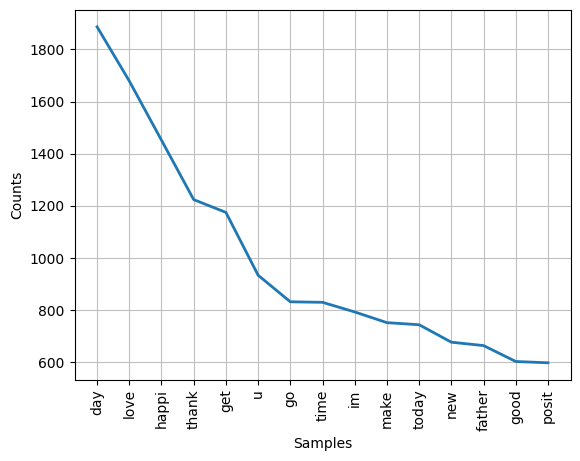

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
count_eachword.plot(15)

In [ ]:
count_eachword1 = FreqDist(words_wth_label1.split(' '))
count_eachword1.most_common(10)

[('libtard', 147),
 ('amp', 127),
 ('like', 104),
 ('trump', 103),
 ('black', 98),
 ('allahsoil', 89),
 ('white', 79),
 ('might', 75),
 ('racist', 69),
 ('feel', 59)]

In [ ]:

tweets = in_info['label']


In [ ]:
tweets

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [ ]:
# Afficher chaque tweet individuellement
for index, tweet in enumerate(tweets):
    print(f'Tweet {index + 1}: {tweet}')

Tweet 1: father dysfunct selfish drag kid dysfunct run
Tweet 2: thank lyft credit cant use caus dont offer wheelchair van pdx disapoint getthank
Tweet 3: bihday majesti
Tweet 4: model love u take u time
Tweet 5: factsguid societi motiv
Tweet 6: huge fan fare big talk leav chao pay disput get allshowandnogo
Tweet 7: camp tomorrow
Tweet 8: next school year year cant think school exam hate imagin actorslif revolutionschool girl
Tweet 9: love land allin cav champion cleveland clevelandcavali
Tweet 10: welcom im
Tweet 11: ireland consum price index mom climb previou may blog silver gold forex
Tweet 12: selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love
Tweet 13: get see daddi today gettingf
Tweet 14: cnn call michigan middl school build wall chant tcot
Tweet 15: comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin
Tweet 16: ouchjunior junior yugyoem omg
Tweet 17: thank paner thank posit
Tweet 18: retweet agre
Tweet 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement TfidfVectorizer (from versions: none)
ERROR: No matching distribution found for TfidfVectorizer


In [ ]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.1/9.2 MB 7.0 MB/s eta 0:00:02
   - -------------------------------------- 0.3/9.2 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.2 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.2 MB 10.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.5/9.2 MB 10.7 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.2 MB 8.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.2 MB 11.0 MB/s eta 0:00:01
   --------------- -

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
